In [129]:
from sklearn.linear_model import *
from sklearn.decomposition import *
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
import numpy as np
%matplotlib inline

In [130]:
df = pd.read_csv('the biggest cleanest csv.csv')
df = df.drop('Unnamed: 0', axis = 1)
df.head()

,bResult,gamelength,blueTopChamp,blueJungleChamp,blueMiddleChamp,blueADCChamp,blueSupportChamp,redTopChamp,redJungleChamp,redMiddleChamp,...,rHeralds_min_35,rHeralds_min_40,rHeralds_min_45,rHeralds_min_50,rHeralds_min_55,rHeralds_min_60,rHeralds_min_65,rHeralds_min_70,rHeralds_min_75,rHeralds_min_80
0,1,40,0.503425,0.485884,0.495627,0.497175,0.521739,0.488987,0.500960,0.541126,...,0,0,0,0,0,0,0,0,0,0
1,0,38,0.488987,0.529891,0.495627,0.495050,0.472000,0.503425,0.509158,0.531034,...,0,0,0,0,0,0,0,0,0,0
2,1,40,0.417266,0.529891,0.541126,0.534586,0.521008,0.514286,0.487805,0.531034,...,0,0,0,0,0,0,0,0,0,0
3,0,41,0.503425,0.509158,0.505353,0.534586,0.526498,0.488987,0.509615,0.481081,...,0,0,0,0,0,0,0,0,0,0
4,1,35,0.488987,0.509158,0.505995,0.425339,0.521739,0.514286,0.485884,0.481081,...,0,0,0,0,0,0,0,0,0,0


In [131]:
y = df['bResult']
X = df.drop('bResult', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33)

In [132]:
pca = PCA(n_components=2)
pca.fit(X)
i = np.identity(181)
coef = pca.transform(i)
coefs = pd.DataFrame(coef, columns=['PC-1', 'PC-2'], index=X.columns)
#max(coefs['PC-2'])
coefs

,PC-1,PC-2
gamelength,-36.428071,1.042501
blueTopChamp,-37.417813,1.063901
blueJungleChamp,-37.417497,1.063653
blueMiddleChamp,-37.417790,1.063044
blueADCChamp,-37.417728,1.064255
blueSupportChamp,-37.417552,1.063493
redTopChamp,-37.417342,1.066221
redJungleChamp,-37.417604,1.065773
redMiddleChamp,-37.417747,1.066821
redADCChamp,-37.417655,1.065862


In [133]:
lr = LogisticRegression()
lr.fit(X[X.columns.values[:11]], y)
lr.score(X[X.columns.values[:11]], y)

0.58521830615465542

In [134]:
X[X.columns.values[:11]]

,gamelength,blueTopChamp,blueJungleChamp,blueMiddleChamp,blueADCChamp,blueSupportChamp,redTopChamp,redJungleChamp,redMiddleChamp,redADCChamp,redSupportChamp
0,40,0.503425,0.485884,0.495627,0.497175,0.521739,0.488987,0.500960,0.541126,0.534586,0.526498
1,38,0.488987,0.529891,0.495627,0.495050,0.472000,0.503425,0.509158,0.531034,0.489217,0.521008
2,40,0.417266,0.529891,0.541126,0.534586,0.521008,0.514286,0.487805,0.531034,0.489217,0.521739
3,41,0.503425,0.509158,0.505353,0.534586,0.526498,0.488987,0.509615,0.481081,0.462121,0.521739
4,35,0.488987,0.509158,0.505995,0.425339,0.521739,0.514286,0.485884,0.481081,0.489217,0.521008
5,24,0.546729,0.529891,0.505353,0.534586,0.521008,0.488987,0.509158,0.481081,0.489217,0.526498
6,39,0.503425,0.509158,0.412500,0.489217,0.521739,0.417266,0.487805,0.505353,0.425339,0.471591
7,43,0.417266,0.509158,0.531034,0.495050,0.521008,0.521870,0.529891,0.505353,0.534586,0.428571
8,41,0.514286,0.485884,0.496350,0.462121,0.521739,0.546729,0.587302,0.639810,0.489217,0.533133
9,32,0.503425,0.466667,0.496350,0.534586,0.471591,0.488987,0.529891,0.505353,0.471990,0.533133


In [135]:
X.head().columns.values

array(['gamelength', 'blueTopChamp', 'blueJungleChamp', 'blueMiddleChamp',
       'blueADCChamp', 'blueSupportChamp', 'redTopChamp', 'redJungleChamp',
       'redMiddleChamp', 'redADCChamp', 'redSupportChamp', 'bTowers_min_0',
       'bTowers_min_5', 'bTowers_min_10', 'bTowers_min_15',
       'bTowers_min_20', 'bTowers_min_25', 'bTowers_min_30',
       'bTowers_min_35', 'bTowers_min_40', 'bTowers_min_45',
       'bTowers_min_50', 'bTowers_min_55', 'bTowers_min_60',
       'bTowers_min_65', 'bTowers_min_70', 'bTowers_min_75',
       'bTowers_min_80', 'bInhibs_min_0', 'bInhibs_min_5',
       'bInhibs_min_10', 'bInhibs_min_15', 'bInhibs_min_20',
       'bInhibs_min_25', 'bInhibs_min_30', 'bInhibs_min_35',
       'bInhibs_min_40', 'bInhibs_min_45', 'bInhibs_min_50',
       'bInhibs_min_55', 'bInhibs_min_60', 'bInhibs_min_65',
       'bInhibs_min_70', 'bInhibs_min_75', 'bInhibs_min_80',
       'bDragons_min_0', 'bDragons_min_5', 'bDragons_min_10',
       'bDragons_min_15', 'bDragons_min_20'

In [136]:
from scipy.stats.stats import pearsonr 

In [137]:
print max([(np.abs(np.corrcoef(y, X[col])[0][1]), col) for col in X.columns.values])

(0.50737650583663163, 'rTowers_min_30')


In [138]:
score_over_time = []
for i in range(85, 0, -5):
    for col in X.columns.values:
        if '_min_' + str(i) in col:
            X = X.drop(col, axis = 1)
    lr = LogisticRegression()
    lr.fit(X, y)
    score_over_time.append(lr.score(X, y))

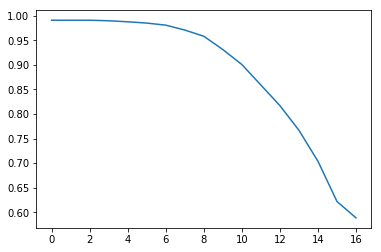

In [139]:
plt.plot(score_over_time)

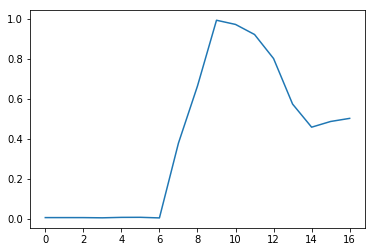

In [168]:
y = df['bResult']
X = df.drop('bResult', axis = 1)

def match_timelines(X):
    timeline = []
    for i in range(85, 0, -5):
        for col in X.columns.values:
            if '_min_' + str(i) in col:
                X = X.drop(col, axis = 1)
        lr = LogisticRegression()
        lr.fit(X, y)
        timeline.append([x[0] for x in lr.predict_proba(X)])
    return timeline
        
print plt.plot(np.array(match_timelines(X)).T[2733])

In [169]:
games = np.array(match_timelines(X)).T

In [170]:
max([(max(game) - min(game), i) for i, game in enumerate(games)])

(0.98839494642651571, 2733)

In [175]:
games_derivative = np.abs(np.diff(games))
print max([(max(game), i) for i, game in enumerate(games_derivative)])

(0.90289149585632333, 2389)


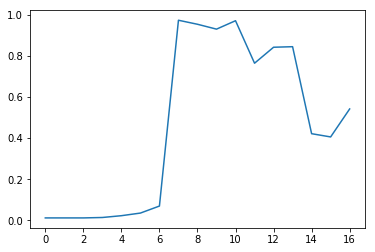

In [176]:
print plt.plot(np.array(match_timelines(X)).T[2389])

In [179]:
print min([(max(game), i) for i, game in enumerate(games_derivative)])

(0.057920077433154304, 1753)


In [196]:
sorted_endgame = sorted([(abs(.5 - game[0]), i) for i, game in enumerate(games)])

In [192]:
def plot_game(i):
    plt.plot(np.array(match_timelines(X)).T[i])

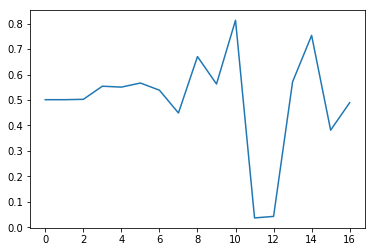

In [193]:
plot_game(824)

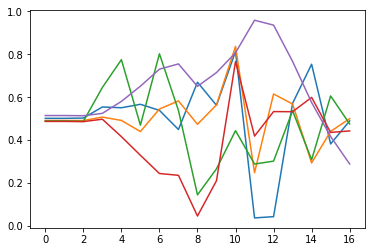

In [198]:
for game in sorted_endgame[:5]:
    plot_game(game[1])